In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns


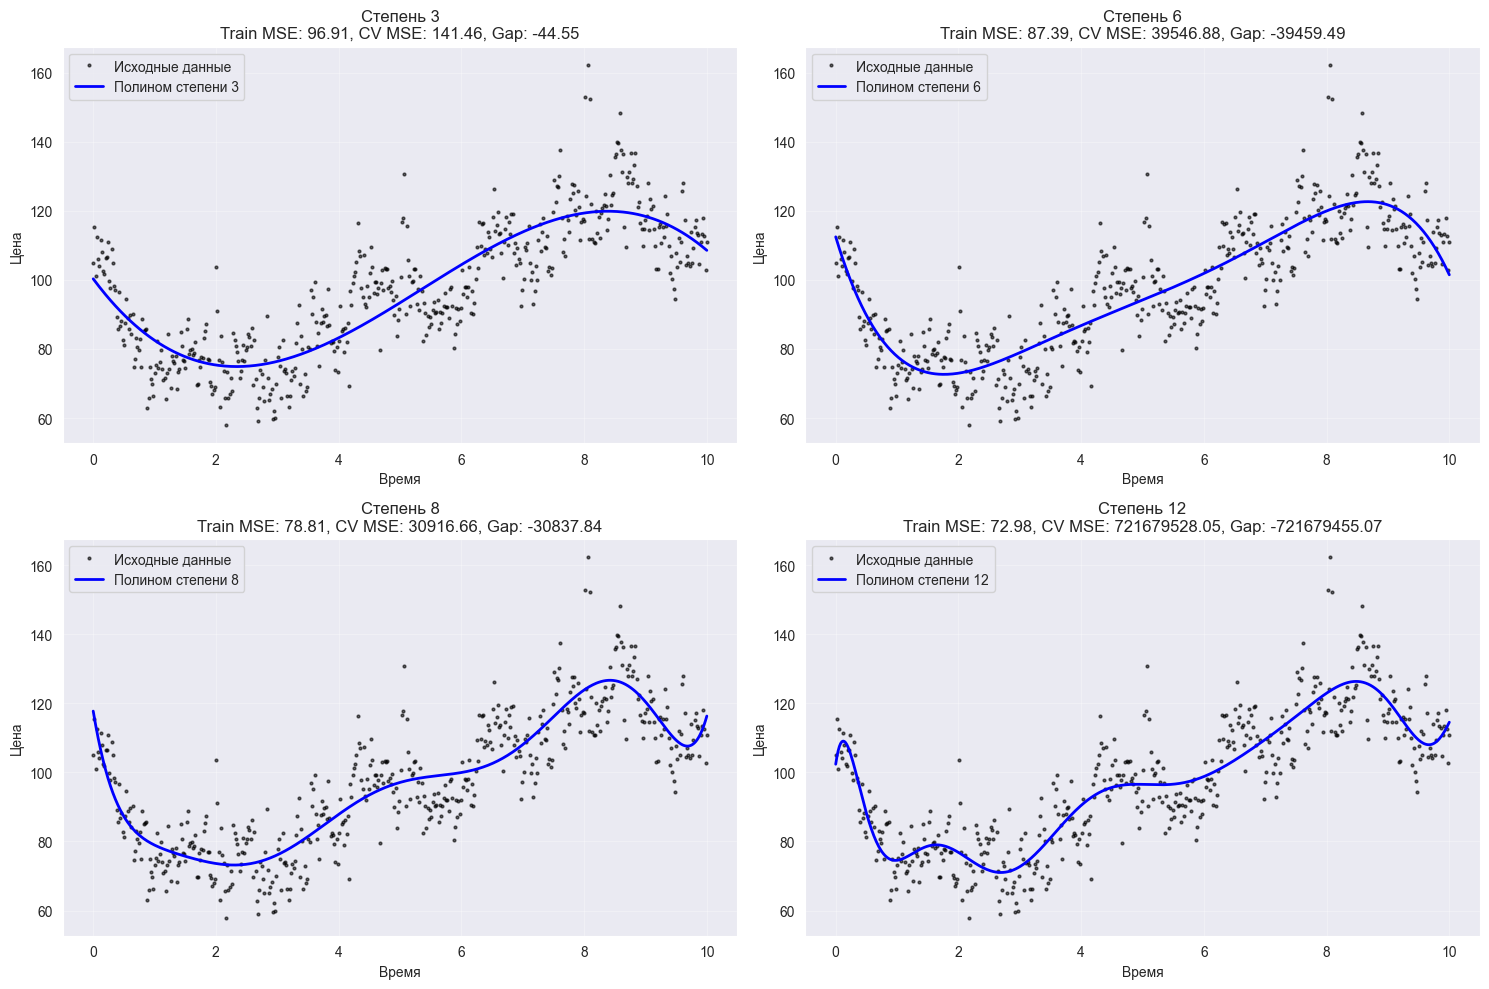

In [3]:
# TODO 1

# Генерация синтетических данных: случайное блуждание + шум + высокочастотные изгибы
np.random.seed(42)
n_points = 500
time = np.linspace(0, 10, n_points)

# Случайные шаги с высоким шумом
steps = np.random.normal(loc=0, scale=2.5, size=n_points)
prices = 100 + np.cumsum(steps)

# Высокочастотные синусоидальные колебания
freq_oscillations = (
    5 * np.sin(8 * np.pi * time) +
    3 * np.sin(20 * np.pi * time) +
    2 * np.sin(35 * np.pi * time)
)
prices += freq_oscillations

# Дополнительный шум
noise = np.random.normal(0, 4.0, n_points)
synthetic_prices = prices + noise

# Рыночные шоки
shock_indices = [100, 250, 400]
for idx in shock_indices:
    shock = np.random.normal(loc=0, scale=20, size=min(5, n_points - idx))
    synthetic_prices[idx:idx+len(shock)] += shock

# Степени полиномов
degrees = [3, 6, 8, 12]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, degree in enumerate(degrees):
    poly_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    
    X = time.reshape(-1, 1)
    y = synthetic_prices
    poly_pipeline.fit(X, y)

    # Предсказание на тренировочных данных
    y_train_pred = poly_pipeline.predict(X)
    train_mse = mean_squared_error(y, y_train_pred)

    # Кросс-валидация
    cv_scores = cross_val_score(poly_pipeline, X, y, cv=5,
                                scoring='neg_mean_squared_error')
    cv_mse = -np.mean(cv_scores)

    # Переобучение: разница между ошибками
    overfit_gap = train_mse - cv_mse

    # Предсказание в пределах обучающего диапазона
    time_extended = np.linspace(0, 10, 500)
    X_extended = time_extended.reshape(-1, 1)
    y_pred = poly_pipeline.predict(X_extended)

    # Визуализация
    axes[i].plot(time, y, 'ko', markersize=2, alpha=0.6,
                 label='Исходные данные')
    axes[i].plot(time_extended, y_pred, 'b-', linewidth=2,
                 label=f'Полином степени {degree}')
    axes[i].set_title(
        f'Степень {degree}\nTrain MSE: {train_mse:.2f}, CV MSE: {cv_mse:.2f}, Gap: {overfit_gap:.2f}')
    axes[i].set_xlabel('Время')
    axes[i].set_ylabel('Цена')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [52]:
# TODO 2

# Генерация синтетических данных: случайное блуждание + шум + высокочастотные изгибы
np.random.seed(42)
n_points = 500
time = np.linspace(0, 10, n_points)

# Случайные шаги с высоким шумом
steps = np.random.normal(loc=0, scale=2.5, size=n_points)
prices = 100 + np.cumsum(steps)
prices1 = 100 + np.cumsum(steps)

# Высокочастотные синусоидальные колебания
freq_oscillations = (
    5 * np.sin(8 * np.pi * time) +
    3 * np.sin(20 * np.pi * time) +
    2 * np.sin(35 * np.pi * time)
)
prices += freq_oscillations

# Дополнительный шум
noise = np.random.normal(0, 4.0, n_points)
synthetic_prices = prices + noise

# Рыночные шоки
shock_indices = [100, 250, 400]
for idx in shock_indices:
    shock = np.random.normal(loc=0, scale=20, size=min(5, n_points - idx))
    synthetic_prices[idx:idx+len(shock)] += shock
    
    
X = time.reshape(-1, 1)
y = synthetic_prices
y_clean = prices1

* `'k'` — цвет: k = black (чёрный),

* `'o'` — маркер: кружок (то есть точки).

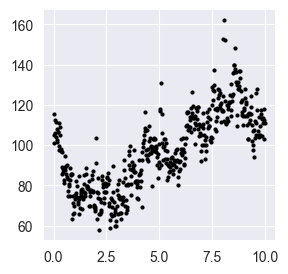

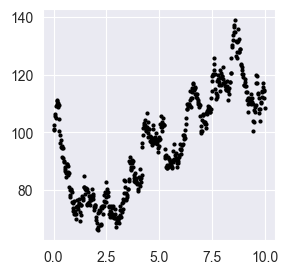

In [53]:
# TODO Цена без шумов и Цена с Шумами

# Цена с Шумами
fig, axes = plt.subplots(figsize=(3, 3))
plt.plot(X, y, 'ko' ,markersize=2)
plt.show()

# Цена без шумов 
fig, axes = plt.subplots(figsize=(3, 3))
plt.plot(X, y_clean, 'ko' ,markersize=2)
plt.show()
# y.shape